# Exploratory Notebook

In [16]:
import pandas as pd
import sqlite3 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Business Question
1. What are the currrent trends by genres in the Box Office
   What genres perform best? - 
2. What budget ranges for movies are the most profitable -  to avoid spending too much, and increase ROI
3. Which actors and directors/ pull in more audiences
4. What are the average lengths of films that perform well
5. 

# 🎬 Exploratory Data Analysis (EDA): Box Office Movie Insights

## 📌 Objective
Our goal is to explore what types of films are currently performing best at the box office, in order to guide our company’s new movie studio toward data-driven content creation.

---

## 1. 🗂️ Data Overview

- Load the dataset
- Preview the first few rows
- Check shape, column names, and data types
- Identify missing values and duplicates

```python
df.shape
df.columns
df.info()
df.head()
df.isnull().sum()
df.duplicated().sum()

> I will start workin the two data sets that i have already and pick relevant data within that i can start my analysis with 

### BOM Dataset EDA
Lets us start by first having a look into the Box Office Movies Dataset and see what it looks like. 


In [21]:
df1 = pd.read_csv('zippedData/bom.movie_gross.csv.gz')
df1.info(), df1.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


(None,
                                          title studio  domestic_gross  \
 0                                  Toy Story 3     BV     415000000.0   
 1                   Alice in Wonderland (2010)     BV     334200000.0   
 2  Harry Potter and the Deathly Hallows Part 1     WB     296000000.0   
 3                                    Inception     WB     292600000.0   
 4                          Shrek Forever After   P/DW     238700000.0   
 
   foreign_gross  year  
 0     652000000  2010  
 1     691300000  2010  
 2     664300000  2010  
 3     535700000  2010  
 4     513900000  2010  )

In [22]:
# looking into df1
print(df1.info())
print("Shape of the dataset")
print(df1.shape)
print()
print("The columns on the dataset:\n", df1.columns)
print()
print("The sum of missing values", df1.isnull().sum())
print()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB
None
Shape of the dataset
(3387, 5)

The columns on the dataset:
 Index(['title', 'studio', 'domestic_gross', 'foreign_gross', 'year'], dtype='object')

The sum of missing values title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64



In [23]:
df1.head(10)

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
5,The Twilight Saga: Eclipse,Sum.,300500000.0,398000000,2010
6,Iron Man 2,Par.,312400000.0,311500000,2010
7,Tangled,BV,200800000.0,391000000,2010
8,Despicable Me,Uni.,251500000.0,291600000,2010
9,How to Train Your Dragon,P/DW,217600000.0,277300000,2010


###  Data Cleaning: Box Office Movies (BOM)

Before analysis, we first explore and clean the dataset to ensure it's ready for univariate, bivariate, and multivariate analyses.

---

####  Missing Values Summary

| Column          | Missing Values |
|-----------------|----------------|
| `title`         | 0              |
| `studio`        | 5              |
| `domestic_gross`| 28             |
| `foreign_gross` | 1350           |
| `year`          | 0              |

---
#### Cleaning Steps

- `studio`: Fill missing values with `"Unknown"`  
- `domestic_gross`: Drop rows with missing values (only 28 rows)  
- `foreign_gross`: Convert from string to numeric (remove commas), then handle missing as needed  
- Add new columns:
  - `worldwide_gross` = domestic + foreign
  - `proportion_foreign` = foreign / worldwide
- Drop duplicates if any

---


In [25]:
df1['title']

0                                       Toy Story 3
1                        Alice in Wonderland (2010)
2       Harry Potter and the Deathly Hallows Part 1
3                                         Inception
4                               Shrek Forever After
                           ...                     
3382                                      The Quake
3383                    Edward II (2018 re-release)
3384                                       El Pacto
3385                                       The Swan
3386                              An Actor Prepares
Name: title, Length: 3387, dtype: object

### 🎬 IMDB Database Analysis

We have an ERD (Entity Relationship Diagram) that shows the schema of our IMDB movie database. This gives us a bird’s eye view of how the data tables are related, helping us make sense of what we are working with and which parts of the database will be most useful in answering business questions.

Below is the ERD for the IMDB dataset:

![IMDB ERD Diagram](movie_data_erd.jpeg)  <!-- Adjust the path as needed -->

---

### 🧭 Next Steps for Analysis

We will follow a structured process to explore and extract value from the database:

#### 🔍 1. **Explore the Tables**
- Load all tables into Pandas DataFrames
- Inspect the shape, columns, and sample data from each

#### 🧹 2. **Clean the Data**
- Handle missing values
- Standardize data types (e.g., dates, numeric fields)
- Remove duplicates
- Engineer new features where helpful (e.g., gross revenue, genre flags)

#### 🧱 3. **Understand Relationships**
- Identify primary and foreign keys
- Decide which joins will allow us to combine useful information (e.g., `movie_basics` + `movie_ratings`)

#### 📊 4. **Perform EDA**
- Univariate: Analyze individual features like genres, years, ratings
- Bivariate: Study relationships like genre vs rating, year vs vote count
- Multivariate: Combine features to reveal deeper patterns (e.g., genre + year + rating)

#### 📈 5. **Visualize Insights**
- Use bar plots, histograms, heatmaps, and scatter plots
- Highlight patterns and trends that are directly relevant to decision-making

#### 🧠 6. **Make Business Recommendations**
- Based on data, suggest what kind of content the company should invest in
- Consider genre performance, ideal release years, director patterns, etc.

---

Let’s begin by exploring and loading all tables from the database!


In [27]:
# opening im.db file 

conn = sqlite3.connect('zippedData/im.db/im.db')
cursor = conn.cursor()

cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
tables = cursor.fetchall()
tables

[('movie_basics',),
 ('directors',),
 ('known_for',),
 ('movie_akas',),
 ('movie_ratings',),
 ('persons',),
 ('principals',),
 ('writers',)]

In [67]:
# Loading movie_basics
q1 = """
SELECT * 
FROM movie_basics
"""
df_movie_basics = pd.read_sql(q1, conn)
df_movie_basics.sample(10)

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
121437,tt7320786,For Our Eyes Only: John Glen,For Our Eyes Only: John Glen,2018,115.0,Documentary
89059,tt5149976,The Red Rain on the Equator,The Red Rain on the Equator,2010,132.0,Documentary
54527,tt3205010,Dragon Guardians,El corazón del roble,2013,73.0,Animation
142584,tt9389852,Prementha Panichese Narayana,Prementha Panichese Narayana,2019,122.0,Drama
139723,tt9042328,Love is Life,Love is Life,2013,NaN,Drama
34404,tt2275505,Altered Reality,Altered Reality,2016,86.0,"Comedy,Documentary"
90705,tt5246780,Flight from a Paradise,Flight from a Paradise,2012,NaN,Drama
58131,tt3390600,Being Poirot,Being Poirot,2013,48.0,Documentary
96889,tt5652740,Doddmane Hudga,Doddmane Hudga,2016,136.0,"Action,Drama,Family"
138971,tt8970208,Kattu Paya Sir Intha Kaali,Kattu Paya Sir Intha Kaali,2018,NaN,"Action,Crime,Drama"


In [29]:
# viewing into the movie_basics dataFrame
df_movie_basics.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [30]:
# Loading the directors tables
q2 = """
SELECT * 
FROM persons
"""
df_directors = pd.read_sql(q2, conn)
df_directors.info(), df_directors.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 606648 entries, 0 to 606647
Data columns (total 5 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   person_id           606648 non-null  object 
 1   primary_name        606648 non-null  object 
 2   birth_year          82736 non-null   float64
 3   death_year          6783 non-null    float64
 4   primary_profession  555308 non-null  object 
dtypes: float64(2), object(3)
memory usage: 23.1+ MB


(None,
    person_id       primary_name  birth_year  death_year  \
 0  nm0061671  Mary Ellen Bauder         NaN         NaN   
 1  nm0061865       Joseph Bauer         NaN         NaN   
 2  nm0062070         Bruce Baum         NaN         NaN   
 3  nm0062195       Axel Baumann         NaN         NaN   
 4  nm0062798        Pete Baxter         NaN         NaN   
 
                                  primary_profession  
 0         miscellaneous,production_manager,producer  
 1        composer,music_department,sound_department  
 2                        miscellaneous,actor,writer  
 3  camera_department,cinematographer,art_department  
 4  production_designer,art_department,set_decorator  )

In [31]:
df_directors.head()

,person_id,primary_name,birth_year,death_year,primary_profession
0,nm0061671,Mary Ellen Bauder,NaN,NaN,"miscellaneous,production_manager,producer"
1,nm0061865,Joseph Bauer,NaN,NaN,"composer,music_department,sound_department"
2,nm0062070,Bruce Baum,NaN,NaN,"miscellaneous,actor,writer"
3,nm0062195,Axel Baumann,NaN,NaN,"camera_department,cinematographer,art_department"
4,nm0062798,Pete Baxter,NaN,NaN,"production_designer,art_department,set_decorator"


In [32]:
q3 = """
SELECT * 
FROM known_for
"""
df_4 = pd.read_sql(q3, conn)
df_4.info(), df_4.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1638260 entries, 0 to 1638259
Data columns (total 2 columns):
 #   Column     Non-Null Count    Dtype 
---  ------     --------------    ----- 
 0   person_id  1638260 non-null  object
 1   movie_id   1638260 non-null  object
dtypes: object(2)
memory usage: 25.0+ MB


(None,
    person_id   movie_id
 0  nm0061671  tt0837562
 1  nm0061671  tt2398241
 2  nm0061671  tt0844471
 3  nm0061671  tt0118553
 4  nm0061865  tt0896534)

In [33]:
q4 = """
SELECT * 
FROM movie_ratings
"""
df_5 = pd.read_sql(q4, conn)
df_5.info(), df_5.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   movie_id       73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


(None,
        averagerating      numvotes
 count   73856.000000  7.385600e+04
 mean        6.332729  3.523662e+03
 std         1.474978  3.029402e+04
 min         1.000000  5.000000e+00
 25%         5.500000  1.400000e+01
 50%         6.500000  4.900000e+01
 75%         7.400000  2.820000e+02
 max        10.000000  1.841066e+06)

In [34]:
q5 = """
SELECT *
FROM movie_akas
"""

df_akas = pd.read_sql(q5, conn)

df_akas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 331703 entries, 0 to 331702
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   movie_id           331703 non-null  object 
 1   ordering           331703 non-null  int64  
 2   title              331703 non-null  object 
 3   region             278410 non-null  object 
 4   language           41715 non-null   object 
 5   types              168447 non-null  object 
 6   attributes         14925 non-null   object 
 7   is_original_title  331678 non-null  float64
dtypes: float64(1), int64(1), object(6)
memory usage: 20.2+ MB


In [35]:
q6 = """
SELECT *
FROM movie_ratings
"""

df_ratings = pd.read_sql(q6, conn)

df_ratings.sample(10), df_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   movie_id       73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


(        movie_id  averagerating  numvotes
 14933  tt5051322            5.2         6
 5717   tt7550576            7.6        54
 20048  tt1935179            7.4    156786
 26837  tt4714428            7.5        13
 51454  tt2268016            5.6     48497
 16626  tt4234744            5.8        76
 34905  tt1964899            5.4         5
 46346  tt3037632            3.2       234
 40109  tt3466816            2.4       271
 36718  tt2262289            7.9        25,
 None)

In [50]:
# principals table 
q7 = """
SELECT *
FROM principals
"""

df_principals = pd.read_sql(q7, conn)

df_principals.sample(10)

,movie_id,ordering,person_id,category,job,characters
698750,tt6017942,7,nm0143403,writer,screenplay by,None
557616,tt3542382,5,nm3981229,director,None,None
610947,tt6053268,3,nm8320107,director,None,None
850453,tt6470512,3,nm1208074,self,None,"[""Himself""]"
690505,tt6730778,9,nm8325523,actress,None,"[""Virginia""]"
673903,tt5125940,6,nm5667794,composer,None,None
444621,tt2946050,5,nm4158052,director,None,None
504059,tt2544112,2,nm5390781,self,None,"[""Herself""]"
148431,tt2300836,2,nm3779250,actress,None,"[""Chelsea Ray""]"
860498,tt6666648,2,nm1466093,actor,None,"[""Jacek Sokolski""]"


In [73]:
# SQL querry to get a meaninful df

# [('movie_basics',),
 # ('directors',),
 # ('known_for',),
 # ('movie_akas',),
 # ('movie_ratings',),
 # ('persons',),
 # ('principals',),
 # ('writers',)]

querry_imdb_1 = """
SELECT
    mb.movie_id,
    mb.primary_title,
    mb.start_year,
    mb.runtime_minutes,
    mb.genres,
    mr.averagerating,
    mr.numvotes,
    p.primary_name AS director_name
FROM movie_basics mb
LEFT JOIN movie_ratings mr ON mb.movie_id = mr.movie_id
LEFT JOIN directors d ON mb.movie_id = d.movie_id
LEFT JOIN persons p ON d.person_id = p.person_id

"""

# load into main IMDB_df

imdb_df = pd.read_sql(querry_imdb_1, conn)

imdb_df.sample(10)

,movie_id,primary_title,start_year,runtime_minutes,genres,averagerating,numvotes,director_name
292375,tt9531810,Sheng di er ji na,2010,NaN,Drama,NaN,NaN,Mailisi
237822,tt6576200,Talent,2017,NaN,Comedy,6.4,11.0,Lucas Frison
160136,tt4231508,April Fools,2015,118.0,Comedy,6.4,311.0,Jun'ichi Ishikawa
290111,tt9331436,"Kollontai, apuntes de resistencia",2018,NaN,Documentary,NaN,NaN,Nicolás Méndez Casariego
278409,tt8528332,The Russian Path,2018,98.0,Documentary,NaN,NaN,Dmitriy Pavlov
31198,tt1753433,American Ghost Hunter,2010,96.0,Documentary,4.4,255.0,Chad Calek
228103,tt6243596,Celebrity Homeless,2017,69.0,Drama,NaN,NaN,Garnel Ambroise
247785,tt7059682,Grindsploitation 4: Meltsploitation,2018,146.0,"Action,Comedy,Horror",4.1,187.0,Katherine King
108033,tt3091166,Our Footloose Remake,2011,98.0,"Comedy,Drama,Music",7.0,24.0,Sean Lynch
295645,tt9834318,Ethumai Methumai,2011,NaN,Comedy,NaN,NaN,Nishantha Weerasingha


In [134]:
# looking into imdb_df
print(imdb_df.info())
print("Shape of the dataset")
print(imdb_df.shape)
print()
print("The columns on the dataset:\n", imdb_df.columns)
print()
print("The sum of missing values", imdb_df.isnull().sum())
print()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 296901 entries, 0 to 296900
Data columns (total 8 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   movie_id         296901 non-null  object 
 1   primary_title    296901 non-null  object 
 2   start_year       296901 non-null  int64  
 3   runtime_minutes  241134 non-null  float64
 4   genres           288111 non-null  object 
 5   averagerating    182141 non-null  float64
 6   numvotes         182141 non-null  float64
 7   director_name    291171 non-null  object 
dtypes: float64(3), int64(1), object(4)
memory usage: 18.1+ MB
None
Shape of the dataset
(296901, 8)

The columns on the dataset:
 Index(['movie_id', 'primary_title', 'start_year', 'runtime_minutes', 'genres',
       'averagerating', 'numvotes', 'director_name'],
      dtype='object')

The sum of missing values movie_id                0
primary_title           0
start_year              0
runtime_minutes     55767
gen

In [123]:
# drop rows missing values
imdb_df_clean = imdb_df.dropna(subset=['runtime_minutes', 'genres', 'director_name'])

# keep movies with votes > 1000
imdb_df_clean = imdb_df_clean[imdb_df_clean['numvotes'] >= 1000]

# filter out extreme runtimes
imdb_df_clean = imdb_df_clean[(imdb_df_clean['runtime_minutes'] >= 30) & (imdb_df_clean['runtime_minutes'] <= 240)]

# extract main genre
imdb_df_clean['genre_main'] = imdb_df_clean['genres'].apply(lambda x: x.split(',')[0] if isinstance(x, str) else x)

# Create a decade column
imdb_df_clean['decade'] = (imdb_df_clean['start_year'] // 10) * 10

imdb_df_clean.head()

,movie_id,primary_title,start_year,runtime_minutes,genres,averagerating,numvotes,director_name,genre_main,decade
5,tt0069049,The Other Side of the Wind,2018,122.0,Drama,6.9,4517.0,Orson Welles,Drama,2010
6,tt0069049,The Other Side of the Wind,2018,122.0,Drama,6.9,4517.0,Orson Welles,Drama,2010
35,tt0249516,Foodfight!,2012,91.0,"Action,Animation,Comedy",1.9,8248.0,Lawrence Kasanoff,Action,2010
36,tt0249516,Foodfight!,2012,91.0,"Action,Animation,Comedy",1.9,8248.0,Lawrence Kasanoff,Action,2010
37,tt0249516,Foodfight!,2012,91.0,"Action,Animation,Comedy",1.9,8248.0,Lawrence Kasanoff,Action,2010


**Univariate Analysis - Distribution based on genre**

Text(0, 0.5, 'Count')

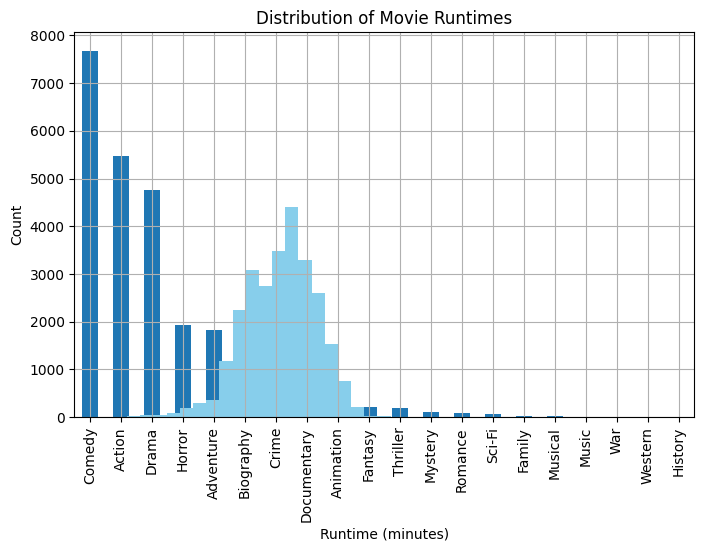

In [132]:
# Distribution of genres
imdb_df_clean['genre_main'].value_counts().plot(kind='bar', figsize=(10,5), title='Genre Distribution')

# Histogram of ratings
imdb_df_clean['averagerating'].hist(bins=20, figsize=(8,5), color='skyblue')
plt.title('Distribution of IMDB Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')

# Runtime distribution
imdb_df_clean['runtime_minutes'].hist(bins=30, figsize=(8,5))
plt.title('Distribution of Movie Runtimes')
plt.xlabel('Runtime (minutes)')
plt.ylabel('Count')


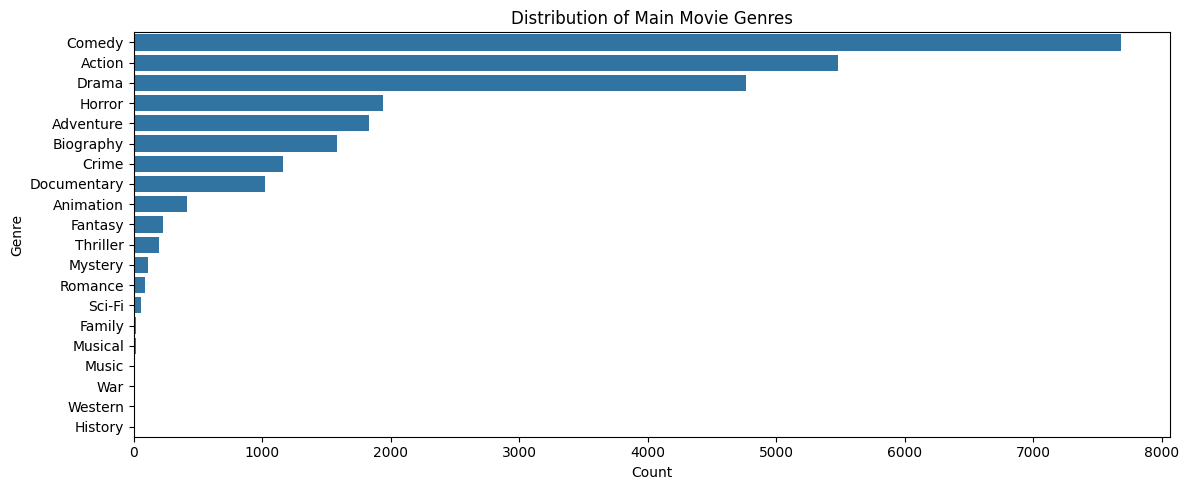

In [125]:
# Count plot
plt.figure(figsize=(12,5))
sns.countplot(data=imdb_df_clean, y='genre_main', order=imdb_df_clean['genre_main'].value_counts().index)
plt.title('Distribution of Main Movie Genres')
plt.xlabel('Count')
plt.ylabel('Genre')
plt.tight_layout()
plt.show()

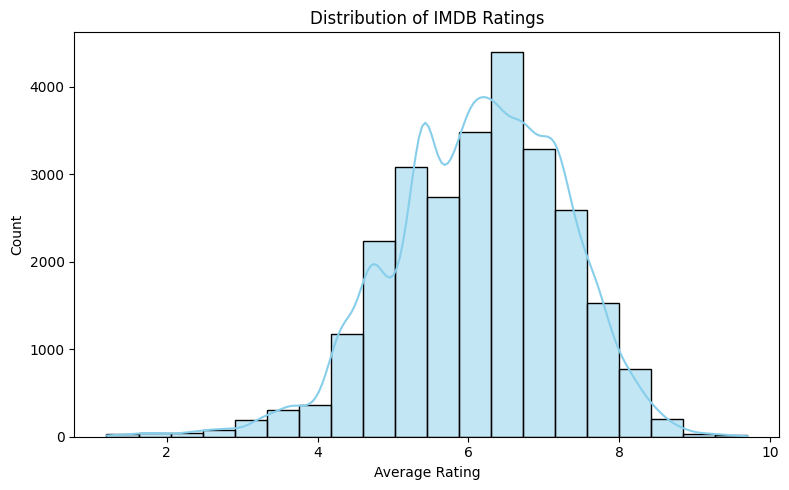

In [130]:
plt.figure(figsize=(8,5))
sns.histplot(imdb_df_clean['averagerating'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of IMDB Ratings')
plt.xlabel('Average Rating')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

**imdb_df_2**

In [91]:
querry_imdb_2 = """
SELECT
    mb.movie_id,
    mb.primary_title,
    mb.start_year,
    mb.runtime_minutes,
    mb.genres,
    mr.averagerating,
    mr.numvotes,
    p_dir.primary_name AS director_name,
    p_writer.primary_name AS writer_name
FROM movie_basics mb
LEFT JOIN movie_ratings mr ON mb.movie_id = mr.movie_id
LEFT JOIN directors d ON mb.movie_id = d.movie_id
LEFT JOIN persons p_dir ON d.person_id = p_dir.person_id
LEFT JOIN writers AS w ON mb.movie_id = w.movie_id
LEFT JOIN persons AS p_writer ON w.person_id = p_writer.person_id
WHERE numvotes >= 1000

"""

imdb_df2 = pd.read_sql(querry_imdb_2, conn)

imdb_df2.head()

,movie_id,primary_title,start_year,runtime_minutes,genres,averagerating,numvotes,director_name,writer_name
0,tt1043726,The Legend of Hercules,2014,99.0,"Action,Adventure,Fantasy",4.2,50352,Renny Harlin,Renny Harlin
1,tt1043726,The Legend of Hercules,2014,99.0,"Action,Adventure,Fantasy",4.2,50352,Renny Harlin,Daniel Giat
2,tt1043726,The Legend of Hercules,2014,99.0,"Action,Adventure,Fantasy",4.2,50352,Renny Harlin,Sean Hood
3,tt1043726,The Legend of Hercules,2014,99.0,"Action,Adventure,Fantasy",4.2,50352,Renny Harlin,Giulio Steve
4,tt1043726,The Legend of Hercules,2014,99.0,"Action,Adventure,Fantasy",4.2,50352,Renny Harlin,Renny Harlin
...,...,...,...,...,...,...,...,...,...
1794474,tt9558612,PM Narendra Modi,2019,136.0,"Biography,Drama",3.7,4057,Omung Kumar,Harsh Limbachiyaa
1794475,tt9558612,PM Narendra Modi,2019,136.0,"Biography,Drama",3.7,4057,Omung Kumar,Vivek Oberoi
1794476,tt9558612,PM Narendra Modi,2019,136.0,"Biography,Drama",3.7,4057,Omung Kumar,Ssandeep Singh
1794477,tt9558612,PM Narendra Modi,2019,136.0,"Biography,Drama",3.7,4057,Omung Kumar,Anirudh Chawla


In [140]:
# looking into imdb_df2

print(imdb_df2.info())
print("Shape of the dataset")
print(imdb_df2.shape)
print()
print("The columns on the dataset:\n", imdb_df2.columns)
print()
print("The sum of missing values", imdb_df2.isnull().sum())
print()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1794479 entries, 0 to 1794478
Data columns (total 9 columns):
 #   Column           Dtype  
---  ------           -----  
 0   movie_id         object 
 1   primary_title    object 
 2   start_year       int64  
 3   runtime_minutes  float64
 4   genres           object 
 5   averagerating    float64
 6   numvotes         int64  
 7   director_name    object 
 8   writer_name      object 
dtypes: float64(2), int64(2), object(5)
memory usage: 123.2+ MB
None
Shape of the dataset
(1794479, 9)

The columns on the dataset:
 Index(['movie_id', 'primary_title', 'start_year', 'runtime_minutes', 'genres',
       'averagerating', 'numvotes', 'director_name', 'writer_name'],
      dtype='object')

The sum of missing values movie_id             0
primary_title        0
start_year           0
runtime_minutes     17
genres              37
averagerating        0
numvotes             0
director_name        2
writer_name        448
dtype: int64



In [176]:
#CLeaning the imdb_2 df

# drop rows missing values
imdb_df_clean2 = imdb_df2.dropna(subset=['runtime_minutes', 'genres', 'director_name', 'writer_name'])

# keep movies with votes > 1000
imdb_df_clean2 = imdb_df_clean2[imdb_df_clean2['numvotes'] >= 1000]

# filter out extreme runtimes
imdb_df_clean2 = imdb_df_clean2[(imdb_df_clean2['runtime_minutes'] >= 30) & (imdb_df_clean2['runtime_minutes'] <= 240)]

# extract main genre
imdb_df_clean2['genre_main'] = imdb_df_clean2['genres'].apply(lambda x: x.split(',')[0] if isinstance(x, str) else x)

# Create a decade column
imdb_df_clean2['decade'] = (imdb_df_clean2['start_year'] // 10) * 10

imdb_df_clean2.head()

,movie_id,primary_title,start_year,runtime_minutes,genres,averagerating,numvotes,director_name,writer_name,genre_main,decade
0,tt1043726,The Legend of Hercules,2014,99.0,"Action,Adventure,Fantasy",4.2,50352,Renny Harlin,Renny Harlin,Action,2010
1,tt1043726,The Legend of Hercules,2014,99.0,"Action,Adventure,Fantasy",4.2,50352,Renny Harlin,Daniel Giat,Action,2010
2,tt1043726,The Legend of Hercules,2014,99.0,"Action,Adventure,Fantasy",4.2,50352,Renny Harlin,Sean Hood,Action,2010
3,tt1043726,The Legend of Hercules,2014,99.0,"Action,Adventure,Fantasy",4.2,50352,Renny Harlin,Giulio Steve,Action,2010
4,tt1043726,The Legend of Hercules,2014,99.0,"Action,Adventure,Fantasy",4.2,50352,Renny Harlin,Renny Harlin,Action,2010


In [177]:
# Looking into our cleaned imd_df2


print(imdb_df_clean2.info())
print("Shape of the dataset")
print(imdb_df_clean2.shape)
print()
print("The columns on the dataset:\n", imdb_df_clean2.columns)
print()
print("The sum of missing values", imdb_df_clean2.isnull().sum())
print()


<class 'pandas.core.frame.DataFrame'>
Index: 1793938 entries, 0 to 1794478
Data columns (total 11 columns):
 #   Column           Dtype  
---  ------           -----  
 0   movie_id         object 
 1   primary_title    object 
 2   start_year       int64  
 3   runtime_minutes  float64
 4   genres           object 
 5   averagerating    float64
 6   numvotes         int64  
 7   director_name    object 
 8   writer_name      object 
 9   genre_main       object 
 10  decade           int64  
dtypes: float64(2), int64(3), object(6)
memory usage: 164.2+ MB
None
Shape of the dataset
(1793938, 11)

The columns on the dataset:
 Index(['movie_id', 'primary_title', 'start_year', 'runtime_minutes', 'genres',
       'averagerating', 'numvotes', 'director_name', 'writer_name',
       'genre_main', 'decade'],
      dtype='object')

The sum of missing values movie_id           0
primary_title      0
start_year         0
runtime_minutes    0
genres             0
averagerating      0
numvotes      

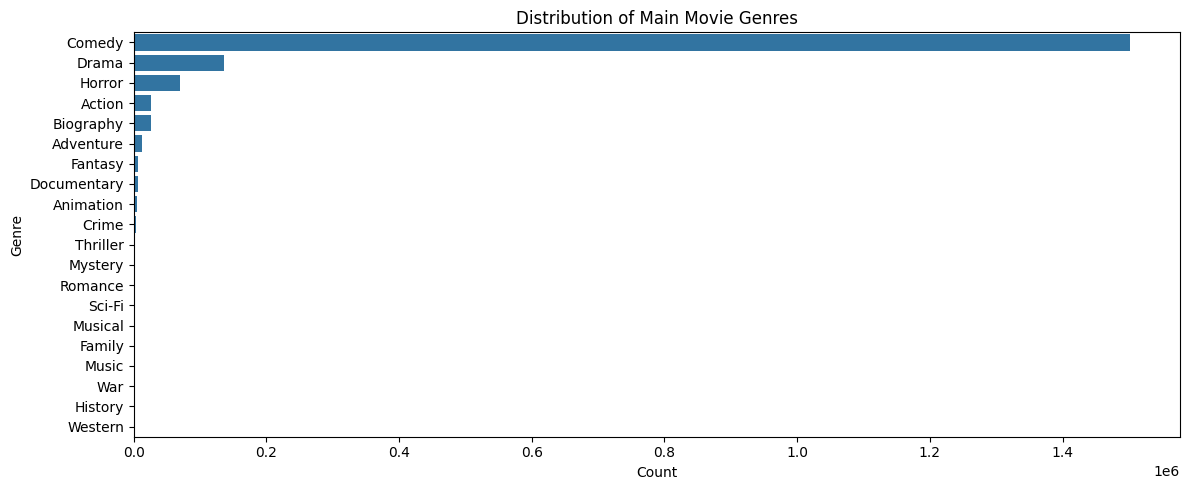

In [174]:
# univariate analysis
plt.figure(figsize=(12,5))
sns.countplot(data=imdb_df_clean2, y='genre_main', order=imdb_df_clean2['genre_main'].value_counts().index)
plt.title('Distribution of Main Movie Genres')
plt.xlabel('Count')
plt.ylabel('Genre')
plt.tight_layout()
plt.show()

###  Bivariate Analysis

We examine the relationships between pairs of variables to identify patterns such as:

- Which genres have the highest average ratings?
- Do longer movies perform better?
- Does vote count correlate with ratings?

<Axes: title={'center': 'Average Rating by Genre'}, xlabel='genre_main'>

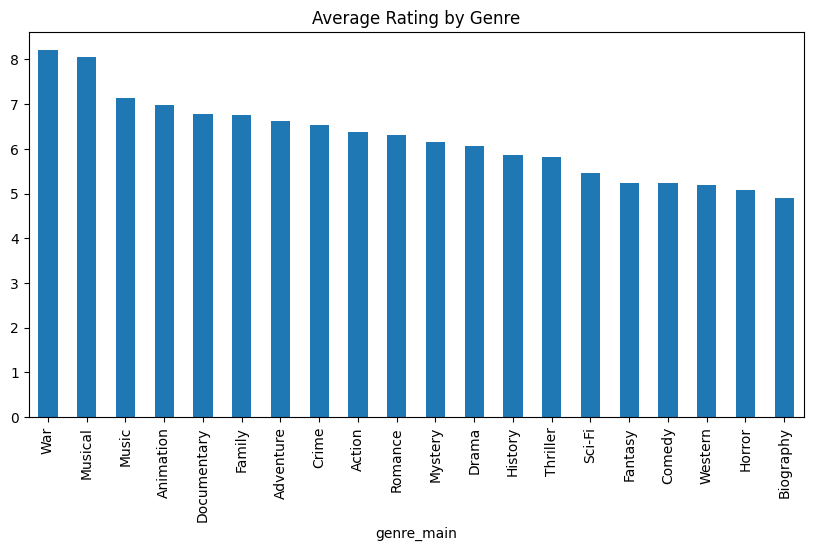

In [201]:
# ploting avaerage rating by genre
imdb_df_clean2.groupby('genre_main')['averagerating'].mean().sort_values(ascending=False).plot(kind='bar', figsize=(10,5), title='Average Rating by Genre')


Text(0.5, 1.0, 'Movie Runtime vs IMDB Rating')

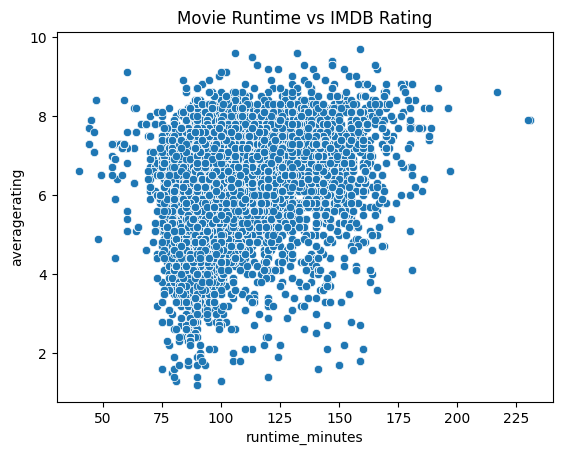

In [205]:
# Runtime vs Rating
sns.scatterplot(data=imdb_df_clean2, x='runtime_minutes', y='averagerating')
plt.title('Movie Runtime vs IMDB Rating')



###  Multivariate Analysis

Now we bring in multiple variables to see how they interact. For example:

- Do certain genres perform better in specific decades?
- Are longer dramas rated better than shorter action films?

Text(0.5, 1.0, 'IMDB Ratings by Genre')

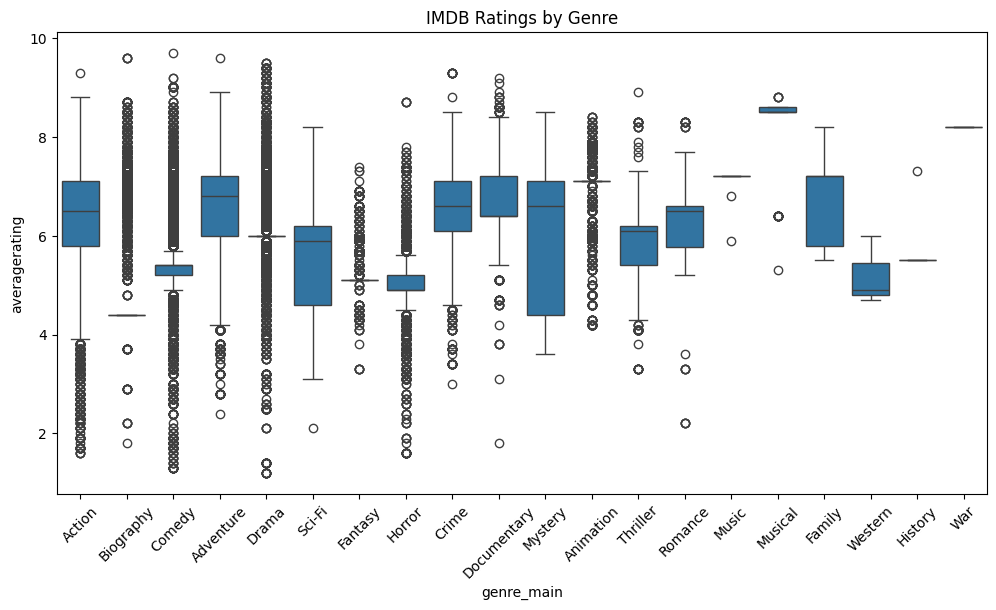

In [228]:
# Boxplot of ratings by genre
plt.figure(figsize=(12,6))
sns.boxplot(data=imdb_df_clean2, x='genre_main', y='averagerating')
plt.xticks(rotation=45)
plt.title('IMDB Ratings by Genre')

Text(0.5, 1.0, 'Correlation Between Numeric Features')

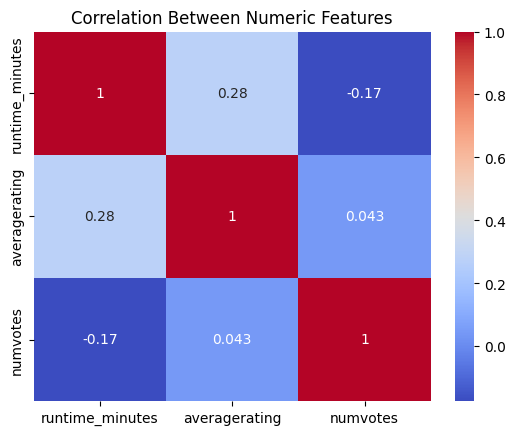

In [214]:
# Heatmap of correlations
numeric_cols = imdb_df_clean2[['runtime_minutes', 'averagerating', 'numvotes']]
sns.heatmap(numeric_cols.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Between Numeric Features')

Text(0.5, 1.0, 'Average Rating by Genre and Decade')

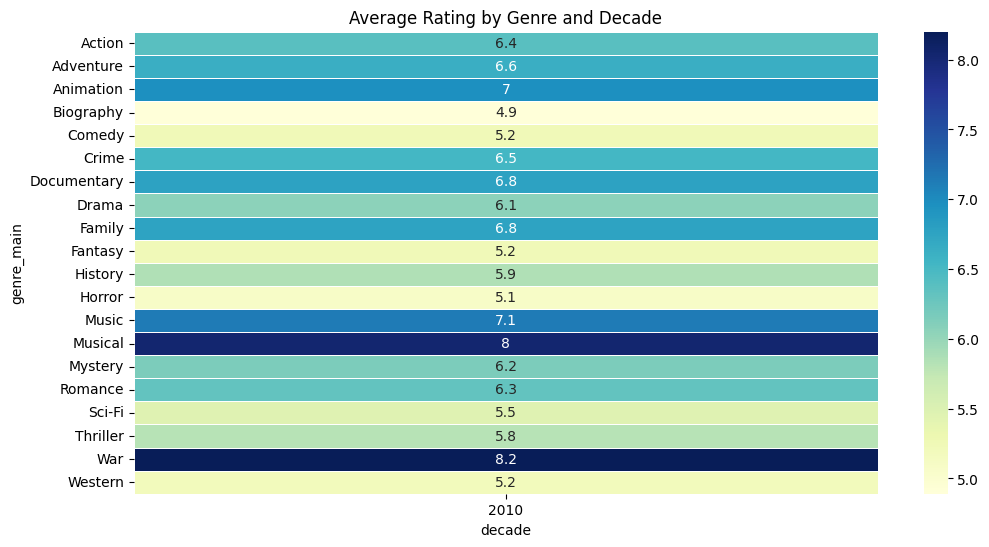

In [222]:
# Average rating by genre and decade
pivot = imdb_df_clean2.pivot_table(index='genre_main', columns='decade', values='averagerating', aggfunc='mean')
plt.figure(figsize=(12,6))
sns.heatmap(pivot, annot=True, cmap='YlGnBu', linewidths=0.5)
plt.title('Average Rating by Genre and Decade')

###  Querying Top Performing Directors

In this query, we aim to identify the top-performing film directors based on two key metrics:

- **Average IMDB rating** of their films
- **Total number of votes**, which reflects audience reach or popularity

To ensure reliability and relevance, we apply two filters:
1. Only include movies that have **at least 1000 votes**, so we focus on widely seen films.
2. Only include directors who have directed **at least 3 such movies**, to ensure enough data per director.

In [233]:
# Top directors based on poularity score and rating 
query_top_directors = """
SELECT 
    p.primary_name AS director_name,
    COUNT(mb.movie_id) AS movie_count,
    ROUND(AVG(mr.averagerating), 2) AS avg_rating,
    SUM(mr.numvotes) AS total_votes
FROM directors d
JOIN persons p ON d.person_id = p.person_id
JOIN movie_basics mb ON d.movie_id = mb.movie_id
JOIN movie_ratings mr ON mb.movie_id = mr.movie_id
WHERE mr.numvotes >= 1000
GROUP BY director_name
HAVING COUNT(mb.movie_id) >= 3  -- filter to active directors
ORDER BY avg_rating DESC, total_votes DESC;
"""

top_directors_df = pd.read_sql(query_top_directors, conn)
top_directors_df.head()

,director_name,movie_count,avg_rating,total_votes
0,Amitabh Reza Chowdhury,3,9.3,55410
1,Mahesh Manjrekar,3,9.2,12891
2,Putrama Tuta,4,9.1,16648
3,Bayu Skak,3,9.0,8976
4,Fajar Nugros,3,9.0,8976


We begin by identifying the **top 20 directors** with the highest average ratings across their movies. This gives insight into who consistently produces well-rated content.

We then use a **scatter plot** to explore the relationship between average rating and total audience votes across all directors. This helps us identify directors who are both **critically acclaimed and popular**—valuable insights for casting or collaboration decisions.

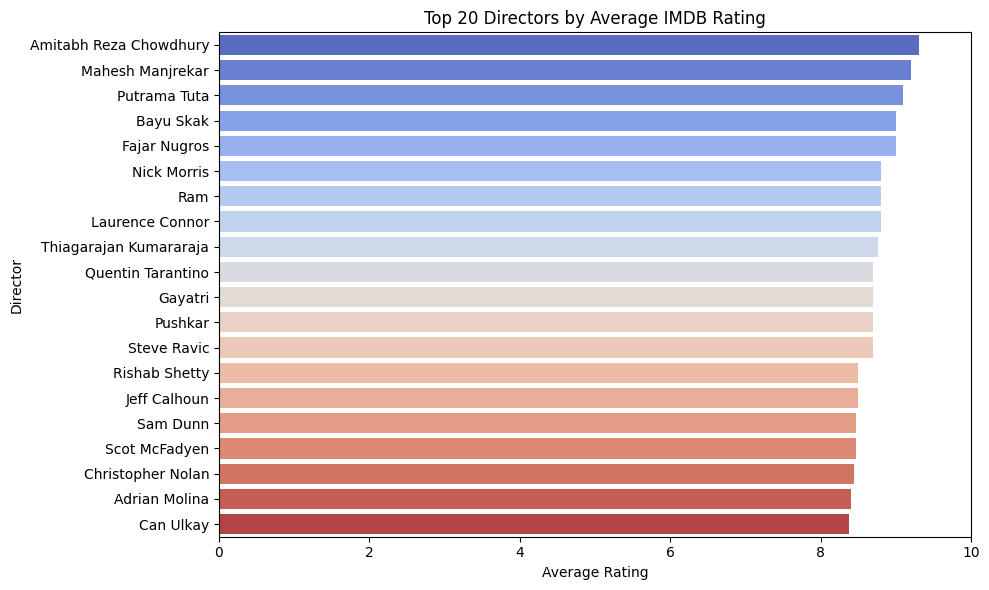

In [231]:
plt.figure(figsize=(10,6))
sns.barplot(data=top_directors_df.head(20), x='avg_rating', y='director_name', palette='coolwarm', hue='director_name', legend=False)
plt.title('Top 20 Directors by Average IMDB Rating')
plt.xlabel('Average Rating')
plt.ylabel('Director')
plt.xlim(0, 10)
plt.tight_layout()
plt.show()

**Scatter plot comparing ratings vs the number of votes cast**

C:\Users\user\AppData\Local\Temp\ipykernel_1968\3408268576.py:11: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
c:\Users\user\anaconda3\envs\DataScience_env\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


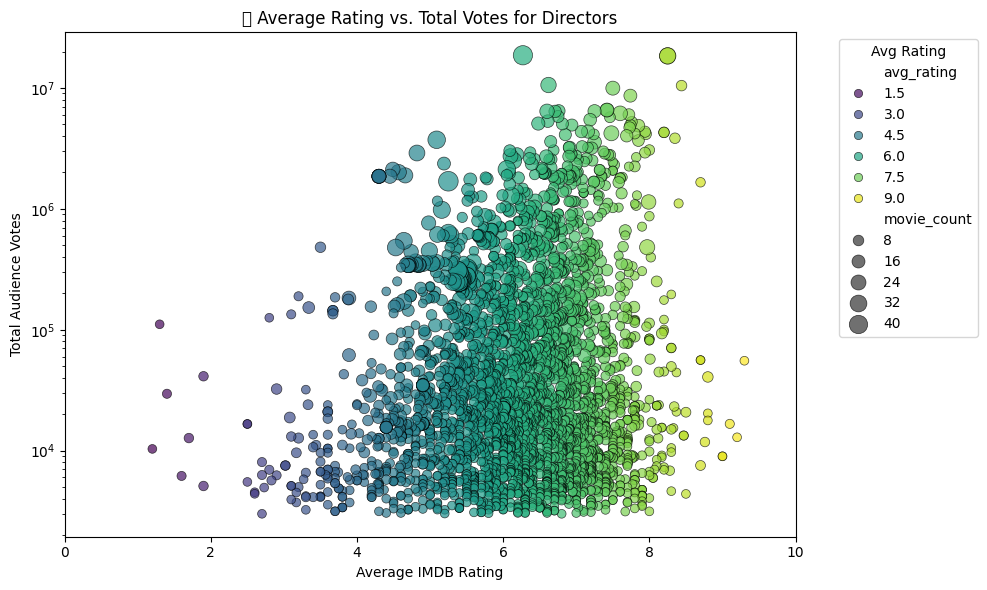

In [171]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=top_directors_df, x='avg_rating', y='total_votes', size='movie_count', hue='avg_rating',
                palette='viridis', sizes=(40, 200), alpha=0.7, edgecolor='black')

plt.title(' Average Rating vs. Total Votes for Directors')
plt.xlabel('Average IMDB Rating')
plt.ylabel('Total Audience Votes')
plt.xlim(0, 10)
plt.yscale('log')  # Log scale helps spread out skewed vote counts
plt.legend(title='Avg Rating', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

###  Querying Top Performing Writers

In this query, we aim to identify the top-performing film directors based on two key metrics:

- **Average IMDB rating** of their films
- **Total number of votes**, which reflects audience reach or popularity

In [189]:
#top_writers

query_top_writers = """
SELECT 
    p.primary_name AS writer_name,
    COUNT(mb.movie_id) AS movie_count,
    ROUND(AVG(mr.averagerating), 2) AS avg_rating,
    SUM(mr.numvotes) AS total_votes
FROM writers w
JOIN persons p ON w.person_id = p.person_id
JOIN movie_basics mb ON w.movie_id = mb.movie_id
JOIN movie_ratings mr ON mb.movie_id = mr.movie_id
WHERE mr.numvotes >= 1000  -- Filter to widely rated movies
GROUP BY writer_name
HAVING COUNT(mb.movie_id) >= 3  -- Writers with 3+ qualifying movies
ORDER BY avg_rating DESC, total_votes DESC
LIMIT 20;
"""

top_writers_df = pd.read_sql(query_top_writers, conn)
top_writers_df.info(), top_writera_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   writer_name  20 non-null     object 
 1   movie_count  20 non-null     int64  
 2   avg_rating   20 non-null     float64
 3   total_votes  20 non-null     int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 772.0+ bytes


(None,
            writer_name  movie_count  avg_rating  total_votes
 0  Anjana Krishnakumar            3        9.40        28887
 1                  Ram            4        8.95        29977
 2    Quentin Tarantino            4        8.68      1655377
 3          Steve Ravic            4        8.60         5148
 4          Vetrimaaran            3        8.40        14699)

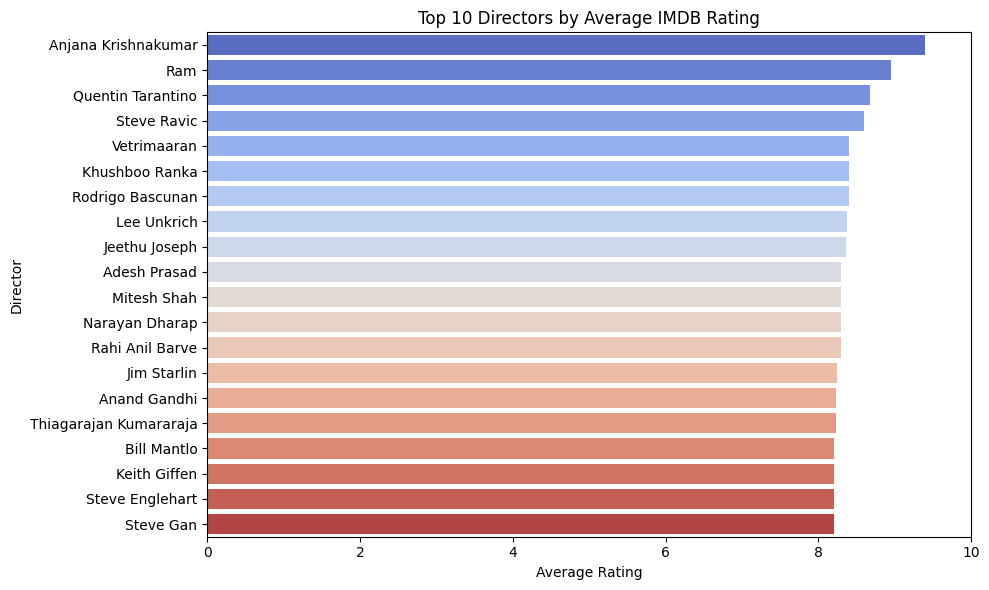

In [193]:
plt.figure(figsize=(10,6))
sns.barplot(data=top_writers_df, x='avg_rating', y='writer_name', palette='coolwarm', hue='writer_name', legend=False)
plt.title('Top 10 Directors by Average IMDB Rating')
plt.xlabel('Average Rating')
plt.ylabel('Director')
plt.xlim(0, 10)
plt.tight_layout()
plt.show()

**tnm.movie_budgets**

In [38]:
# Open tn_movie_budgets
df_budgets = pd.read_csv('zippedData/tn.movie_budgets.csv.gz')
df_budgets.head(), df_budgets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


(   id  release_date                                        movie  \
 0   1  Dec 18, 2009                                       Avatar   
 1   2  May 20, 2011  Pirates of the Caribbean: On Stranger Tides   
 2   3   Jun 7, 2019                                 Dark Phoenix   
 3   4   May 1, 2015                      Avengers: Age of Ultron   
 4   5  Dec 15, 2017            Star Wars Ep. VIII: The Last Jedi   
 
   production_budget domestic_gross worldwide_gross  
 0      $425,000,000   $760,507,625  $2,776,345,279  
 1      $410,600,000   $241,063,875  $1,045,663,875  
 2      $350,000,000    $42,762,350    $149,762,350  
 3      $330,600,000   $459,005,868  $1,403,013,963  
 4      $317,000,000   $620,181,382  $1,316,721,747  ,
 None)

In [39]:
df_budgets.sample(10)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
1940,41,"Jun 13, 2003",Dumb and Dumberer: When Harry Met Lloyd,"$30,000,000","$26,214,846","$26,214,846"
3643,44,"Mar 14, 2014",Bad Words,"$10,000,000","$7,779,614","$7,843,145"
3840,41,"Apr 23, 1999",Election,"$8,500,000","$14,943,582","$17,202,854"
5776,77,"Dec 31, 2004",The Mongol King,"$7,000",$900,$900
1591,92,"Sep 17, 2010",The Town,"$37,000,000","$92,186,262","$152,566,881"
5695,96,"Dec 31, 2015",Lunchtime Heroes,"$100,000",$0,$0
3560,61,"Oct 27, 2017",Jigsaw,"$10,000,000","$38,052,832","$102,445,196"
3658,59,"Mar 20, 2015",Danny Collins,"$10,000,000","$5,637,066","$8,465,845"
2796,97,"Jun 29, 1984",Conan the Destroyer,"$18,000,000","$26,400,000","$26,400,000"
1214,15,"Oct 18, 2002",The Ring,"$48,000,000","$129,094,024","$248,218,486"


**tmdb.movies**

In [56]:
# open tmdb.movis.csv 

df_tmdb = pd.read_csv('zippedData/tmdb.movies.csv.gz')

df_tmdb.head()

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


**rotten tomatoes**

In [66]:
# opening rotten tomatoes movie info 

df_rt_movies = pd.read_csv('zippedData/rt.movie_info.tsv.gz', sep='\t')

df_rt_movies.head()

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN


In [68]:
df_rt_movies.info(), df_rt_movies.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            1560 non-null   int64 
 1   synopsis      1498 non-null   object
 2   rating        1557 non-null   object
 3   genre         1552 non-null   object
 4   director      1361 non-null   object
 5   writer        1111 non-null   object
 6   theater_date  1201 non-null   object
 7   dvd_date      1201 non-null   object
 8   currency      340 non-null    object
 9   box_office    340 non-null    object
 10  runtime       1530 non-null   object
 11  studio        494 non-null    object
dtypes: int64(1), object(11)
memory usage: 146.4+ KB


(None,
 id                 0
 synopsis          62
 rating             3
 genre              8
 director         199
 writer           449
 theater_date     359
 dvd_date         359
 currency        1220
 box_office      1220
 runtime           30
 studio          1066
 dtype: int64)